In [35]:
# library
library(ggplot2)
library(tidyverse)
library(ggpubr)

In [2]:
#Import CSV

all <- read.csv("data/results/meteorites.csv")

head(all)

,X,name,id,nametype,recclass,mass_in_grams,fell_or_found,year,latitude,longitude,GeoLocation,group_name,Chondrite.Achondrite,type,L3,L4
,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,5625,Aachen,1,Valid,L5,21,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",L,Chondrite,Stony,Ordinary,L
2,568,Aarhus,2,Valid,H6,720,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",H,Chondrite,Stony,Ordinary,H
3,916,Abajo,4,Valid,H5,331,Found,1982,26.80000,-105.41667,"(26.8, -105.41667)",H,Chondrite,Stony,Ordinary,H
4,918,Abbott,5,Valid,H3-6,21100,Found,1951,36.30000,-104.28333,"(36.3, -104.28333)",H,Chondrite,Stony,Ordinary,H
5,399,Abee,6,Valid,EH4,107000,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",EH,Chondrite,Stony,Enstatite,EH-EL
6,6004,Abernathy,7,Valid,L6,2914,Found,1941,33.85000,-101.80000,"(33.85, -101.8)",L,Chondrite,Stony,Ordinary,L


In [3]:
falls <- subset(all, fell_or_found == 'Fell')
head(falls)
dim(falls)

,X,name,id,nametype,recclass,mass_in_grams,fell_or_found,year,latitude,longitude,GeoLocation,group_name,Chondrite.Achondrite,type,L3,L4
,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,5625,Aachen,1,Valid,L5,21,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",L,Chondrite,Stony,Ordinary,L
2,568,Aarhus,2,Valid,H6,720,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",H,Chondrite,Stony,Ordinary,H
5,399,Abee,6,Valid,EH4,107000,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",EH,Chondrite,Stony,Enstatite,EH-EL
9,0,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",Acapulcoite,Achondrite,Stony,Primitive,-
367,5626,Achiras,370,Valid,L6,780,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",L,Chondrite,Stony,Ordinary,L
374,400,Adhi Kot,379,Valid,EH4,4239,Fell,1919,32.10000,71.80000,"(32.1, 71.8)",EH,Chondrite,Stony,Enstatite,EH-EL


[1] 1097   16

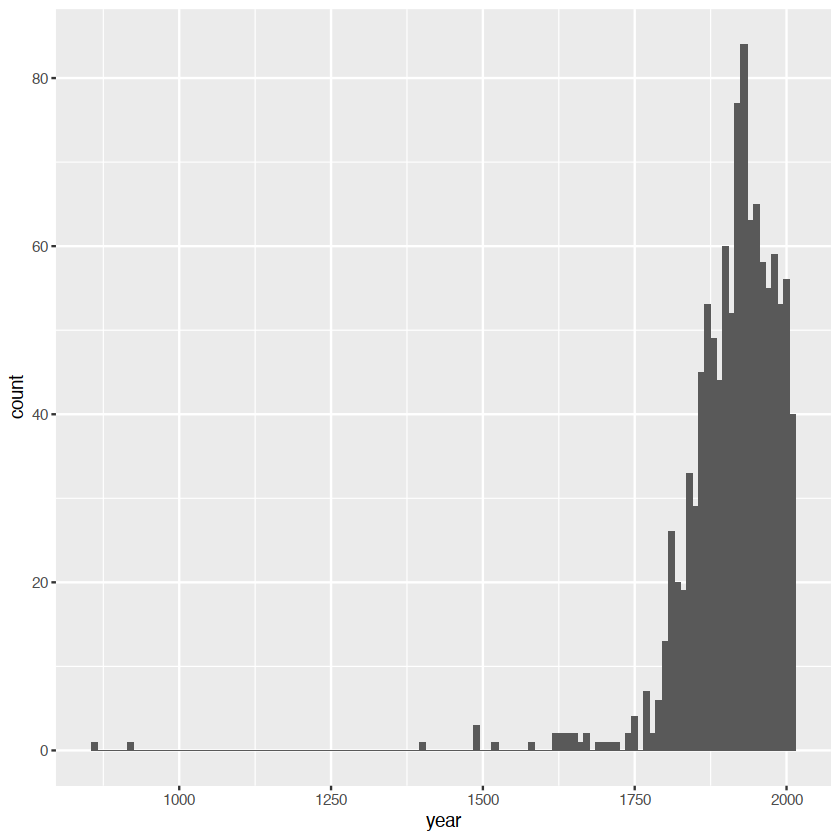

In [15]:
p <- ggplot(falls, aes(x=year)) + 
  geom_histogram(binwidth=10)

p



In [5]:
# This looks similar to a population growth....

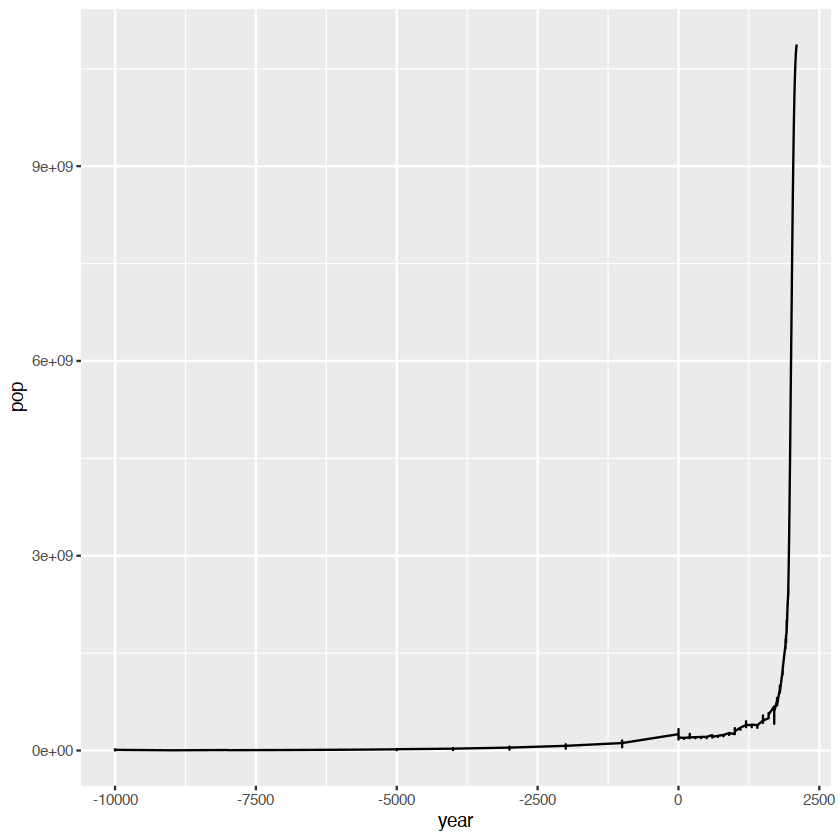

In [6]:
worldpop <- read.csv("data/worldpop/worldpop.csv")

worldpop <- worldpop %>% 
             rename(pop = World.Population.over.12000.years..various.sources..2019..,
                    year = Year)

p <- ggplot(worldpop, aes(x=year,y=pop)) + 
  geom_line()

p



In [7]:
# I am going to try to normalize the fall count with population

In [16]:
avg_worldpop <- worldpop %>% group_by(year) %>% summarize(avg=mean(pop))
avg_worldpop <- as.data.frame(avg_worldpop)
avg_worldpop <- avg_worldpop[avg_worldpop$year >= 800 & avg_worldpop$year <= 2013,]

head(avg_worldpop)

,year,avg
,<int>,<dbl>
19,800,233658427
20,900,259164965
21,1000,277546116
22,1100,336303459
23,1200,392693680
24,1300,380961413


In [22]:
fall_count <- count(falls, vars = year)

fall_count$decade <- floor(fall_count$vars/10)*10

falls_decade <- aggregate(fall_count$n, by=list(Category=fall_count$decade), FUN=sum)

head(falls_decade)


,Category,x
,<dbl>,<int>
1,860,1
2,920,1
3,1390,1
4,1490,3
5,1510,1
6,1580,1


In [27]:
for (i in 1:nrow(falls_decade)){
    x <- falls_decade$Category[i]
    w <- avg_worldpop$year

    closestVal = w[which.min(abs(w-x))]
    pop <- avg_worldpop[avg_worldpop$year == closestVal,]$avg

    falls_decade$pop[i] <- pop      
}

head(falls_decade)

,Category,x,pop
,<dbl>,<int>,<dbl>
1,860,1,259164965
2,920,1,259164965
3,1390,1,370909931
4,1490,3,451668483
5,1510,1,451668483
6,1580,1,538844605


In [28]:
falls_decade <- falls_decade %>% rename(
    decade = Category,
    meteorite_falls = x,
    population = pop
    )

In [42]:
falls_decade$falls_per_1M <- falls_decade$meteorite_falls/(falls_decade$population/1000000)

head(falls_decade)
tail(falls_decade)

,decade,meteorite_falls,population,falls_per_1M
,<dbl>,<int>,<dbl>,<dbl>
1,860,1,259164965,0.003858546
2,920,1,259164965,0.003858546
3,1390,1,370909931,0.002696072
4,1490,3,451668483,0.006642040
5,1510,1,451668483,0.002214013
6,1580,1,538844605,0.001855823


,decade,meteorite_falls,population,falls_per_1M
,<dbl>,<int>,<dbl>,<dbl>
39,1960,59,3015124138,0.019568017
40,1970,58,3679610592,0.015762538
41,1980,56,4441530568,0.012608266
42,1990,54,5296638045,0.010195146
43,2000,60,6104865661,0.009828226
44,2010,12,6956824000,0.001724925


In [47]:
falls_decade <- falls_decade[-c(44), ]   # Dropping 2010s since they aren't complete in the dataset.



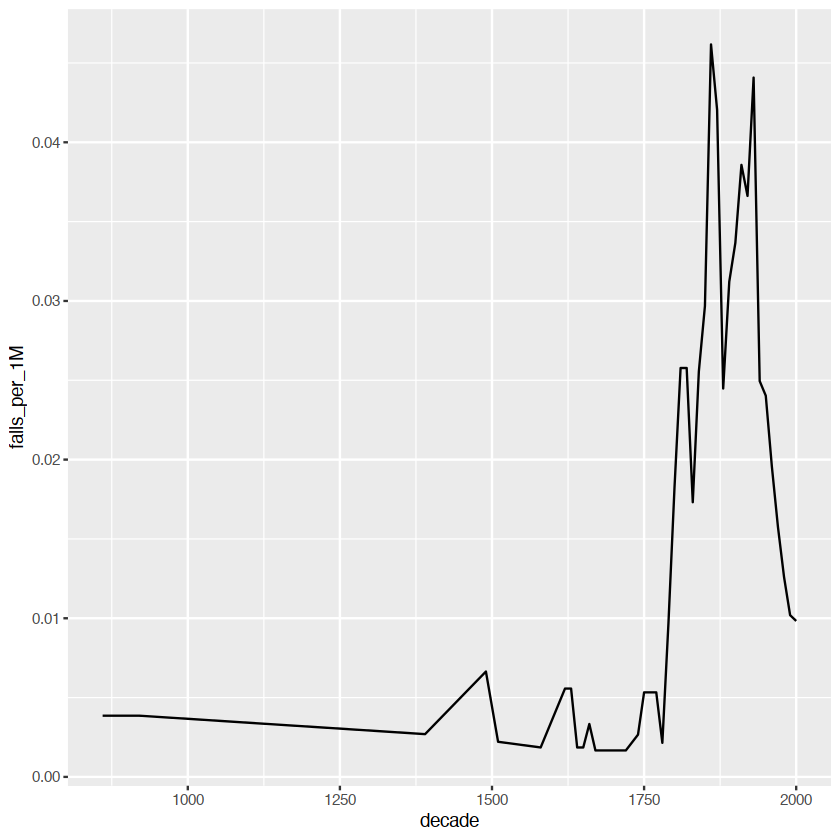

In [48]:
p <- ggplot(falls_decade, aes(x=decade,y=falls_per_1M)) + 
  geom_line()

p

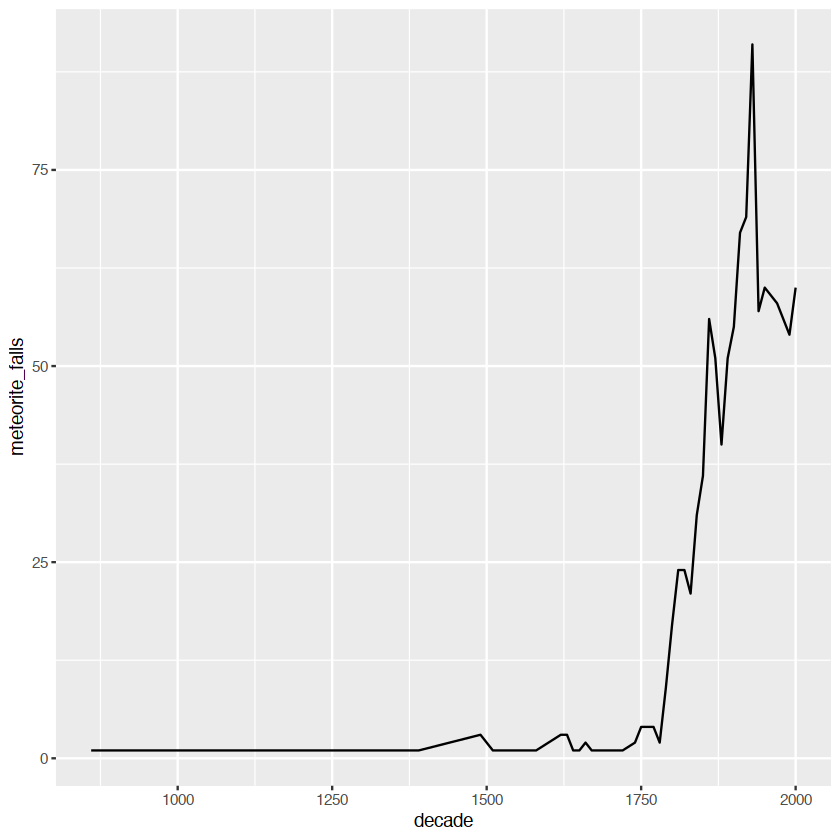

In [49]:
p <- ggplot(falls_decade, aes(x=decade,y=meteorite_falls)) + 
  geom_line()

p

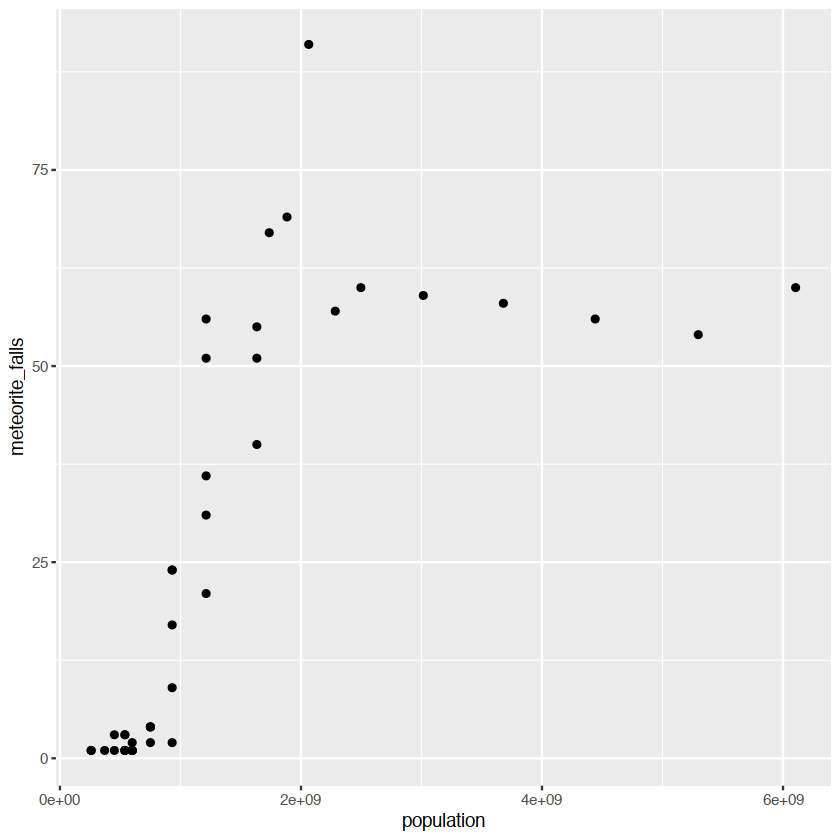

In [50]:
p <- ggplot(falls_decade, aes(x=population, y=meteorite_falls)) + 
  geom_point()

p

In [52]:
res <- cor.test(falls_decade$population, falls_decade$meteorite_falls, method = "pearson")
res


	Pearson's product-moment correlation

data:  falls_decade$population and falls_decade$meteorite_falls
t = 6.4757, df = 41, p-value = 9.111e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5222776 0.8334292
sample estimates:
      cor 
0.7110795 


In [ ]:
## Reject the null hypothesis.  There is a strong correlation between population 
## and the number of meteorites observed falling.

## Results

### Are the numbers of meteorite falls consistent over history or are they changing?

The numbers of meteorite falls observed is increasing over time.  (See fig 1 below).

When normalized against population, the number is sloping downward before a huge peak in the early 1800s and just coming back down (see fig 2)

### Is there any connection to human population?

Statistically speaking, yes.  The number of falls increases with population, and there is a Pearson's correlation value of 0.711 between population and number of meteorite falls observed. (See fig 3 below)

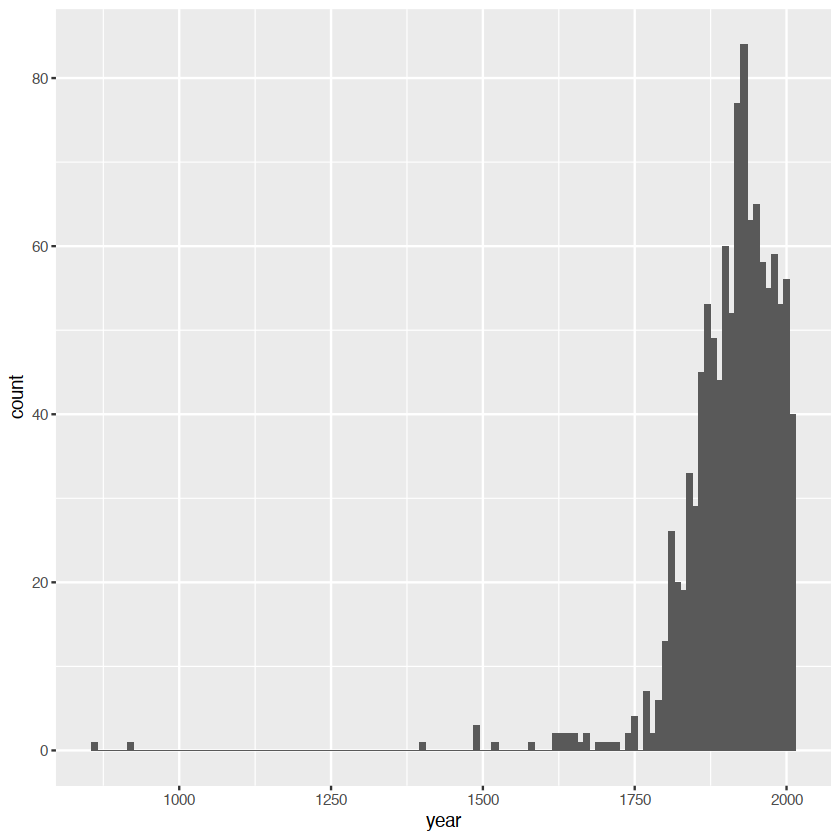

In [56]:
#Figure 1

p <- ggplot(falls, aes(x=year)) + 
  geom_histogram(binwidth=10)

p

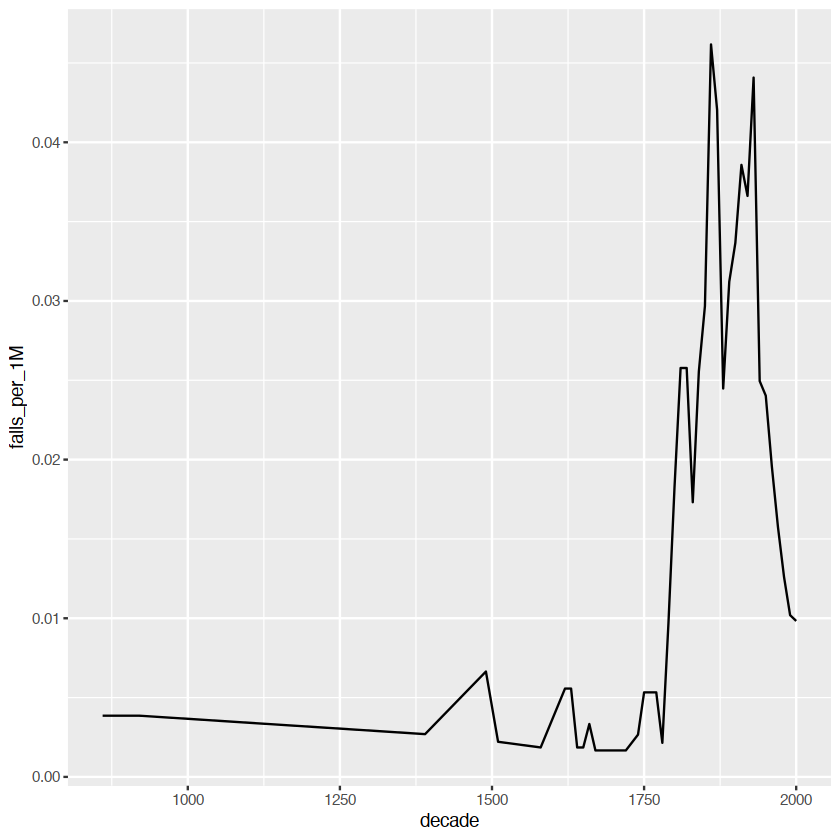

In [57]:
#Figure 2

p <- ggplot(falls_decade, aes(x=decade,y=falls_per_1M)) + 
  geom_line()

p

`geom_smooth()` using formula 'y ~ x'



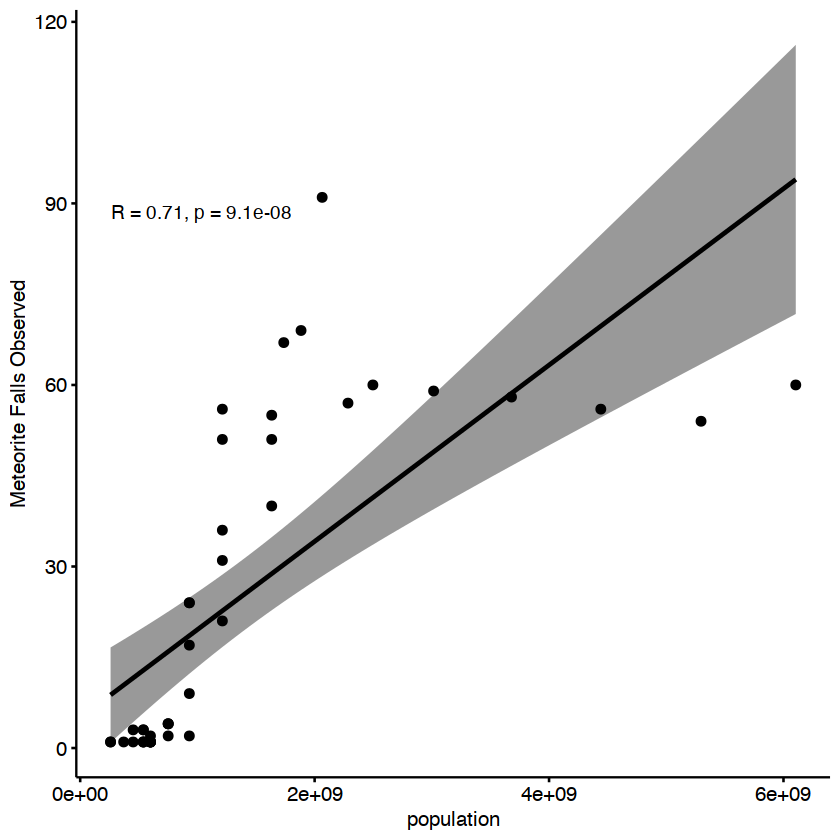

In [74]:
#Figure 3
ggscatter(falls_decade, x = "population", y = "meteorite_falls", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "population", ylab = "Meteorite Falls Observed")
